In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
from pymc3.gp.util import plot_gp_dist

#https://docs.pymc.io/notebooks/GP-Marginal.html

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


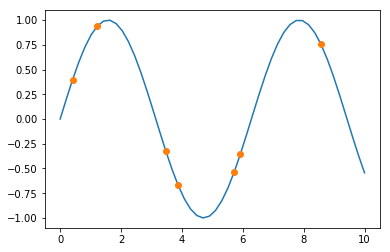

In [2]:
np.random.seed(5)
x = np.linspace(0, 10)[:, None]
y = np.sin(x)

X = np.random.choice(x.flatten(), 7, replace=False)[:, None]
Y = np.sin(X)

plt.plot(x, y)
plt.plot(X, Y, 'o')

In [25]:
with pm.Model() as model:
    ls = pm.HalfCauchy('ls', beta=5)
    
    # zero mean
    mean = pm.gp.mean.Constant(0)
    # input_dim = the total columns of X
    cov = pm.gp.cov.ExpQuad(input_dim=1, ls=ls)
    
    # The GP
    gp = pm.gp.Marginal(mean , cov)
        
    # Observed data
    f = gp.marginal_likelihood('y_obs', X, Y.flatten(), noise=0)
    
    # Conditional GP
    f_star = gp.conditional('f*', x) 
    step = pm.NUTS()

    trace = pm.sample(chains=1, step=step, tune=50, draws=100)

/opt/miniconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
NUTS: [f*, ls]
100%|██████████| 150/150 [03:43<00:00,  1.05it/s]
The acceptance probability does not match the target. It is 0.9064175024104284, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [26]:
with model:
    pred_samples = pm.sample_ppc(trace, vars=[f_star, f], samples=1000)

100%|██████████| 1000/1000 [00:01<00:00, 891.40it/s]


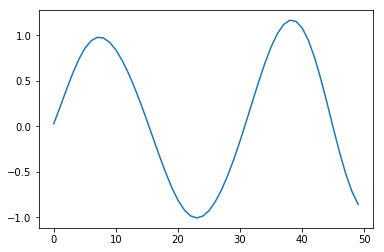

In [27]:
plt.plot(pred_samples['f*'].mean(0))

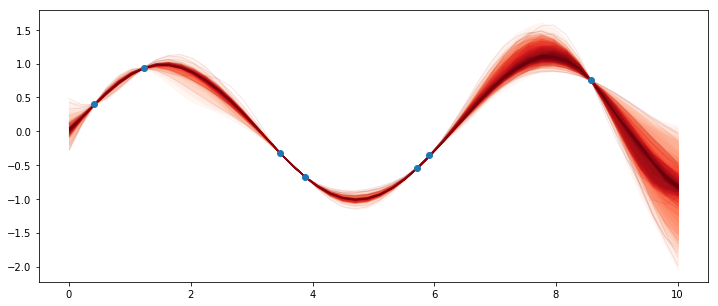

In [28]:
# plot the results
fig = plt.figure(figsize=(12,5))
ax = fig.gca()

plot_gp_dist(ax, pred_samples["f*"], x)
plt.plot(X, Y, 'o')

In [29]:
with model:
    prior_pc = pm.sample_prior_predictive(samples=100)

/opt/miniconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
